<a href="https://colab.research.google.com/github/BuriboD/laba_3/blob/main/laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключение Pandas и NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

#3. web-scraping
url = "https://conomy.ru/education/articles/147"
id_table = 0
df_power = pd.read_html(url, header = 0, index_col = 0)[id_table]
df_power

,«Интер РАО»,«РусГидро»,«Юнипро»,«Мосэнерго»,ОГК-2,ТГК-1,«Энел Россия»
"Теплогенерация, МВт",31390,8506,11245,12825,19012,4062,5629
"Гидрогенерация, МВт",439,29366,0,0,0,2856,0
"Ветрогенерация, МВт",32,5,0,0,0,0,0
"Солнечная генерация, МВт",0,3,0,0,0,0,0
"Геотермальная генерация, МВт",0,74,0,0,0,0,0
"Общая мощность, МВт",31860,37954,11245,12825,19012,6918,5629


In [ ]:
# 4.2. Добавление к таблице столбца с новыми данными
df_power['Итого мощность, МВт'] = df_power['«Интер РАО»']+df_power['«РусГидро»']+df_power['«Юнипро»']+df_power['«Мосэнерго»']+df_power['ОГК-2']+df_power['ТГК-1']+df_power['«Энел Россия»']
df_power
df_power['Выработка за сутки'] = df_power['Итого мощность, МВт'] * 24 #выработка энергии всей отрасли за сутки
df_power

,«Интер РАО»,«РусГидро»,«Юнипро»,«Мосэнерго»,ОГК-2,ТГК-1,«Энел Россия»,"Итого мощность, МВт",Выработка за сутки
"Теплогенерация, МВт",31390,8506,11245,12825,19012,4062,5629,92669,2224056
"Гидрогенерация, МВт",439,29366,0,0,0,2856,0,32661,783864
"Ветрогенерация, МВт",32,5,0,0,0,0,0,37,888
"Солнечная генерация, МВт",0,3,0,0,0,0,0,3,72
"Геотермальная генерация, МВт",0,74,0,0,0,0,0,74,1776
"Общая мощность, МВт",31860,37954,11245,12825,19012,6918,5629,125443,3010632


In [ ]:
#4.1. Сортировка данных
df_power = df_power.sort_values(['Выработка за сутки'], ascending = False)
df_power

,«Интер РАО»,«РусГидро»,«Юнипро»,«Мосэнерго»,ОГК-2,ТГК-1,«Энел Россия»,"Итого мощность, МВт",Выработка за сутки
"Общая мощность, МВт",31860,37954,11245,12825,19012,6918,5629,125443,3010632
"Теплогенерация, МВт",31390,8506,11245,12825,19012,4062,5629,92669,2224056
"Гидрогенерация, МВт",439,29366,0,0,0,2856,0,32661,783864
"Геотермальная генерация, МВт",0,74,0,0,0,0,0,74,1776
"Ветрогенерация, МВт",32,5,0,0,0,0,0,37,888
"Солнечная генерация, МВт",0,3,0,0,0,0,0,3,72


In [ ]:
#4.3. Выбор фрагмента таблицы по условию
# Выбрать электростанции с итоговой мощностью ниже 1000 МВт
print(df_power[df_power['Итого мощность, МВт'] < 1000.])
print()

                              «Интер РАО»  «РусГидро»  «Юнипро»  «Мосэнерго»  \
Геотермальная генерация, МВт            0          74         0            0   
Ветрогенерация, МВт                    32           5         0            0   
Солнечная генерация, МВт                0           3         0            0   

                              ОГК-2  ТГК-1  «Энел Россия»  \
Геотермальная генерация, МВт      0      0              0   
Ветрогенерация, МВт               0      0              0   
Солнечная генерация, МВт          0      0              0   

                              Итого мощность, МВт  Выработка за сутки  
Геотермальная генерация, МВт                   74                1776  
Ветрогенерация, МВт                            37                 888  
Солнечная генерация, МВт                        3                  72  



In [ ]:
#4.4. Выбор фрагмента таблицы по номерам строк и столбцов
df_power_2 = df_power.copy()
print('данные из первой строки и второго столбца')
print(df_power_2.iloc[1 , 2])
print()
print('данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно')
print(df_power_2.iloc[: -2, 2 : 5])
print()
print('данные из нечетных строк и третьего столбца')
print(df_power_2.iloc[ : : 2, 3])
print()

данные из первой строки и второго столбца
11245

данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно
                              «Юнипро»  «Мосэнерго»  ОГК-2
Общая мощность, МВт              11245        12825  19012
Теплогенерация, МВт              11245        12825  19012
Гидрогенерация, МВт                  0            0      0
Геотермальная генерация, МВт         0            0      0

данные из нечетных строк и третьего столбца
Общая мощность, МВт    12825
Гидрогенерация, МВт        0
Ветрогенерация, МВт        0
Name: «Мосэнерго», dtype: int64



In [ ]:
#4.5. Расчеты статистических показателей по сгруппированным данным

# Максимальная выработка за сутки по итоговой мощности.
print(df_power.groupby(['Итого мощность, МВт'])['Выработка за сутки'].max())
print()

# Число видов генерации энергии в компании «РусГидро» по выработке мощности за сутки выше 2000 МВт
print(df_power.groupby(['«РусГидро»', df_power['Выработка за сутки'] > 2000])['Выработка за сутки'].count())
print()

Итого мощность, МВт
3              72
37            888
74           1776
32661      783864
92669     2224056
125443    3010632
Name: Выработка за сутки, dtype: int64

«РусГидро»  Выработка за сутки
3           False                 1
5           False                 1
74          False                 1
8506        True                  1
29366       True                  1
37954       True                  1
Name: Выработка за сутки, dtype: int64



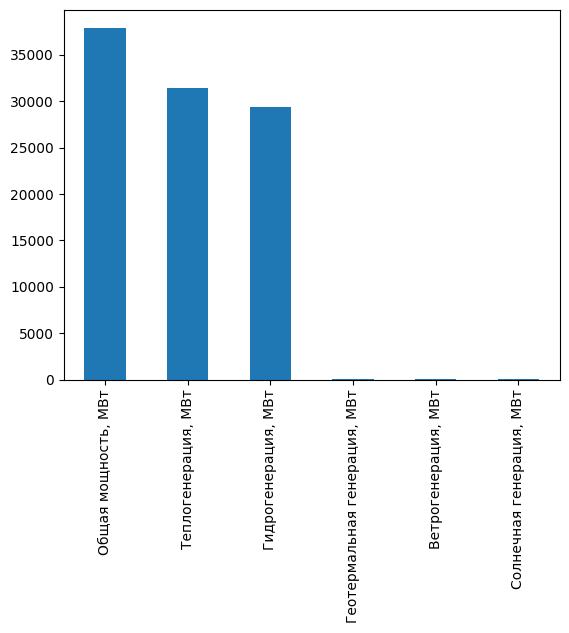

In [ ]:
#4.6. Построение гистограммы по данным
df_power['«Интер РАО»'].plot(kind = 'bar')
df_power['«РусГидро»'].plot(kind = 'bar')
df_power['«Юнипро»'].plot(kind = 'bar')
df_power['«Мосэнерго»'].plot(kind = 'bar')
df_power['ОГК-2'].plot(kind = 'bar')
df_power['ТГК-1'].plot(kind = 'bar')
df_power['«Энел Россия»'].plot(kind = 'bar')
print()

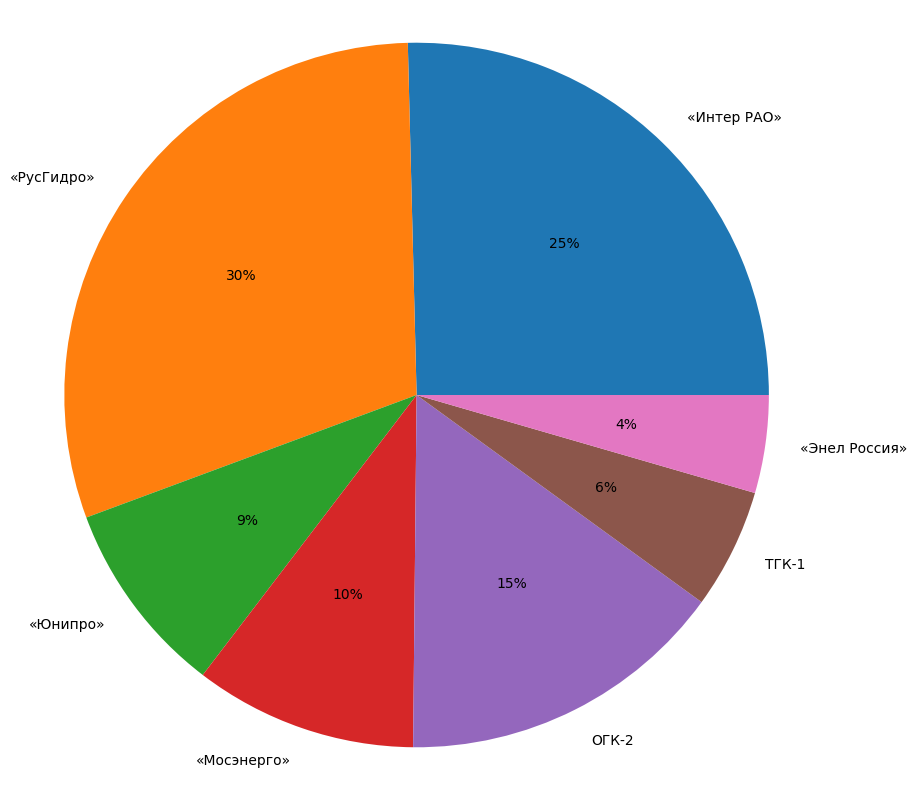

In [ ]:
#4.7. Построение круговой диаграммы по данным
input_matrix = df_power.values
generation_sum = (input_matrix[: , :7 ]).sum(axis = 0)

labels = df_power.columns[ : 7]

fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(generation_sum, labels = labels, autopct = '%1.0f%%')
ax1.axis('equal')

plt.show()